In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("Data.csv")

In [4]:
df["E1"]  = LabelEncoder().fit_transform(df['Question1'])
df["E2"]  = LabelEncoder().fit_transform(df['Question2'])
df["E3"]  = LabelEncoder().fit_transform(df['Question3'])
df['E4']  = LabelEncoder().fit_transform(df['Question4'])
df["E5"]  = LabelEncoder().fit_transform(df['Question5'])
df["E6"]  = LabelEncoder().fit_transform(df['Question6'])
df["E7"]  = LabelEncoder().fit_transform(df['Question7'])
df["E8"]  = LabelEncoder().fit_transform(df['Question8'])
df["E9"]  = LabelEncoder().fit_transform(df['Question9'])
df["E10"] = LabelEncoder().fit_transform(df['Question10'])
df["E11"] = LabelEncoder().fit_transform(df['Question11'])
df["E12"] = LabelEncoder().fit_transform(df['Question12'])
df["E13"] = LabelEncoder().fit_transform(df['Question13'])
df["E14"] = LabelEncoder().fit_transform(df['Question14'])
df["E15"] = LabelEncoder().fit_transform(df['Question15'])

In [5]:
Question_Dict = {
    "Question1":"Do you help your fellow students/classmates with their studies  in a certain subject?",
    "Question2":"Peer tutoring is a practical thing to do to maintain their academic performance",
    "Question3":"Peer tutoring can help both students involved achieve their academic  goals",
    "Question4":"Both the tutor and the student being tutored can develop better communication and interpersonal skills through the tutoring process.",
    "Question5":"Peer tutoring is an opportunity to exchange ideas which can help me to have a deeper understanding with the subject matter",
    "Question6":"How does the duration of peer tutoring sessions corelate to academic improvement?",
    "Question7":"What challenges, if any, have you encountered during peer tutoring sessions, and how could they be addressed?",
    "Question8":"Have you noticed an improvement in your academic performance since engaging in peer tutoring?",
    "Queation9":"What role does student engagement play in the effectiveness of peer tutoring?",
    "Question10":"How does the feedback mechanism work within peer tutoring sessions contribute to continuous improvement in studies?",
    "Question11":"In what way peer tutoring contribute to critical thinking among students?",
    "Question12":"How does the structure of peer tutoring programs, such as one-on-one sessions versus group sessions, influence academic outcomes?",
    "Question13":"Does the tutor-tutee relationship impact learning outcomes?",
    "Question14":"How does the tutor's experience level influence academic improvements?",
    "Question15":"In conclusion, what is the end result of peer tutoring to you?"
}

In [6]:
df.head()

,Timestamp,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,...,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15
0,11/22/2023 6:56:16,Yes,Agree,Strongly agree,Strongly disagree,Strongly Agree,Positive Correlation,Time constraints,"Yes, significantly",Critical Factor,...,2,3,3,0,0,2,2,1,2,2
1,11/22/2023 7:02:20,Yes,Agree,Strongly agree,Neutral,Strongly Agree,Positive Correlation,Time constraints,"Yes, significantly",Critical Factor,...,2,3,3,0,0,2,0,1,2,2
2,11/22/2023 7:02:36,Yes,Agree,Agree,Agree,Agree,Positive Correlation,Time constraints,"Yes, moderately",Critical Factor,...,2,3,2,0,0,2,1,1,2,2
3,11/22/2023 7:06:37,Yes,Agree,Agree,Agree,Agree,Positive Correlation,Communication barriers,"Yes, moderately",Moderately important,...,2,0,2,2,0,0,2,2,2,2
4,11/22/2023 7:51:11,Yes,Agree,Strongly agree,Strongly disagree,Strongly Agree,Positive Correlation,Communication barriers,"Yes, significantly",Moderately important,...,2,0,3,2,0,2,1,1,2,2


In [7]:
question1_counts = df['Question1'].value_counts(normalize=True) * 100
print(question1_counts)


Question1
Yes    98.031496
No      1.968504
Name: proportion, dtype: float64


In [8]:
question2_counts = df['Question2'].value_counts(normalize=True) * 100
print(question2_counts)


Question2
Agree               80.708661
Moderately Agree    17.322835
Disagree             1.968504
Name: proportion, dtype: float64


In [9]:
question3_counts = df['Question3'].value_counts(normalize=True) * 100
print(question3_counts)


Question3
Strongly agree    52.362205
Agree             40.551181
Neutral            5.905512
Disagree           1.181102
Name: proportion, dtype: float64


In [10]:
question4_counts = df['Question4'].value_counts(normalize=True) * 100
print(question4_counts)


Question4
Agree                41.035857
Strongly agree       31.474104
Strongly disagree    17.928287
Neutral               6.772908
Disagree              2.788845
Name: proportion, dtype: float64


In [11]:
question5_counts = df['Question5'].value_counts(normalize=True) * 100
print(question5_counts)


Question5
Strongly Agree       50.393701
Agree                41.338583
Neutral               5.118110
Strongly Disagree     1.968504
Disagree              1.181102
Name: proportion, dtype: float64


In [12]:
question6_counts = df['Question6'].value_counts(normalize=True) * 100
print(question6_counts)

Question6
Positive Correlation            79.527559
No Correlation with duration    18.110236
Negative Correlation             2.362205
Name: proportion, dtype: float64


In [13]:
question7_counts = df['Question7'].value_counts(normalize=True) * 100
print(question7_counts)


Question7
Mismatched learning styles    40.551181
Time constraints              29.527559
Communication barriers        19.685039
Lack of preparation           10.236220
Name: proportion, dtype: float64


In [14]:
question8_counts = df['Question8'].value_counts(normalize=True) * 100
print(question8_counts)


Question8
Yes, moderately           50.000000
Yes, significantly        41.732283
No noticeable change       7.874016
Decline in performance     0.393701
Name: proportion, dtype: float64


In [15]:
question9_counts = df['Question9'].value_counts(normalize=True) * 100
print(question9_counts)


Question9
Moderately important    51.968504
Critical Factor         42.519685
Minor Influence          4.724409
No significant role      0.787402
Name: proportion, dtype: float64


In [16]:
question10_counts = df['Question10'].value_counts(normalize=True) * 100
print(question10_counts)


Question10
Essential for improvement    64.566929
Moderately important         32.283465
No impact                     3.149606
Name: proportion, dtype: float64


In [17]:
question11_counts = df['Question11'].value_counts(normalize=True) * 100
print(question11_counts)


Question11
Significant Contribution    57.480315
Moderate Contribution       38.582677
No effect                    3.937008
Name: proportion, dtype: float64


In [18]:
question12_counts = df['Question12'].value_counts(normalize=True) * 100
print(question12_counts)


Question12
One-on-one sessions are more effective                      37.795276
Group sessions are more effective                           30.314961
Both one-on-one and group sessions are equally effective    29.527559
Structure has no significant impact                          2.362205
Name: proportion, dtype: float64


In [19]:
question13_counts = df['Question13'].value_counts(normalize=True) * 100
print(question13_counts)


Question13
Friends tutoring each other          70.472441
Doesn't matter                       14.960630
Randomly paired tutors and tutees    14.566929
Name: proportion, dtype: float64


In [20]:
question14_counts = df['Question14'].value_counts(normalize=True) * 100
print(question14_counts)


Question14
Positive Correlation     91.338583
No significant impact     6.299213
Negative Correlation      2.362205
Name: proportion, dtype: float64


In [21]:
question15_counts = df['Question15'].value_counts(normalize=True) * 100
print(question15_counts)


Question15
It is really accessible and helpful to me                 66.929134
It has its pros and cons, offering mixed effectiveness    29.921260
It is not effective to me at all                           3.149606
Name: proportion, dtype: float64


In [22]:
total_yes_students = df[df['Question1'] == 'Yes'].shape[0]
percentage_positive = (df[(df['Question1'] == 'Yes') & (df['Question15'] == 'It is really accessible and helpful to me')].shape[0] / total_yes_students) * 100
percentage_neutral = (df[(df['Question1'] == 'Yes') & (df['Question15'] == 'It has its pros and cons, offering mixed effectiveness')].shape[0] / total_yes_students) * 100
percentage_negative = (df[(df['Question1'] == 'Yes') & (df['Question15'] == 'It is not effective to me at all')].shape[0] / total_yes_students) * 100

print(f"Percentage of 'Yes' responses in Question 15 - Positive: {percentage_positive:.2f}%")
print(f"Percentage of 'Yes' responses in Question 15 - Neutral: {percentage_neutral:.2f}%")
print(f"Percentage of 'Yes' responses in Question 15 - Negative: {percentage_negative:.2f}%")


Percentage of 'Yes' responses in Question 15 - Positive: 67.07%
Percentage of 'Yes' responses in Question 15 - Neutral: 30.12%
Percentage of 'Yes' responses in Question 15 - Negative: 2.81%


Question 1

In [ ]:
#What is the average reported academic improvement among students engaged in peer tutoring?

#H0: 50% students are engaged in peer tutoring
#H1: more than 50% students are engaged in peer tutoring
yes_count = df[df['Question1'] == 'Yes'].shape[0]
total_responses = df.shape[0]
sample_proportion = yes_count / total_responses

#Null hypo
null_hypothesis_proportion = 0.5

z_stat, p_value = proportions_ztest(yes_count, total_responses, null_hypothesis_proportion, alternative='larger')

print(f"Sample Proportion: {sample_proportion:.2%}")
print(f"Null Hypothesis Proportion: {null_hypothesis_proportion:.2%}")
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The proportion of students engaged in peer tutoring is more than 50%.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to suggest the proportion is more than 50%.")


Sample Proportion: 98.03%
Null Hypothesis Proportion: 50.00%
Z-Statistic: 55.1051
P-Value: 0.0000
Reject the null hypothesis: The proportion of students engaged in peer tutoring is more than 50%.


# Question 2

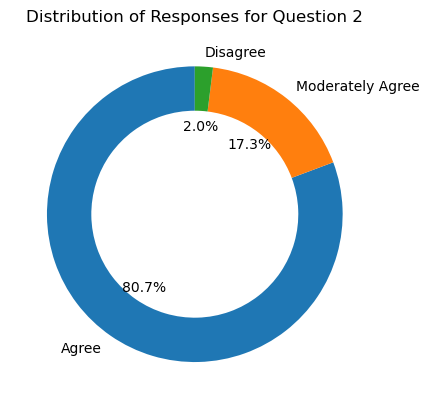

Peer tutoring is a practical thing to do to maintain their academic performance


In [ ]:
question2_counts = df['Question2'].value_counts()
plt.pie(question2_counts, labels=question2_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Responses for Question 2')
plt.show()
print(Question_Dict['Question2'])


 Question 6

In [ ]:
#Is there any significant correlation between tutoring duration and reported academic improvement
#H0:There is no significant correlation
#H1:There is a significant correlation
pearson_corr, p_value = pearsonr(df['E6'], df['E15'])

print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"P-Value: {p_value:.4f}")

# Hypothesis testing
alpha = 0.05

if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant correlation.")
else:
    print("\nFail to reject the null hypothesis: No significant correlation.")


Pearson Correlation Coefficient: 0.2417
P-Value: 0.0001

Reject the null hypothesis: There is a significant correlation.


Question 7


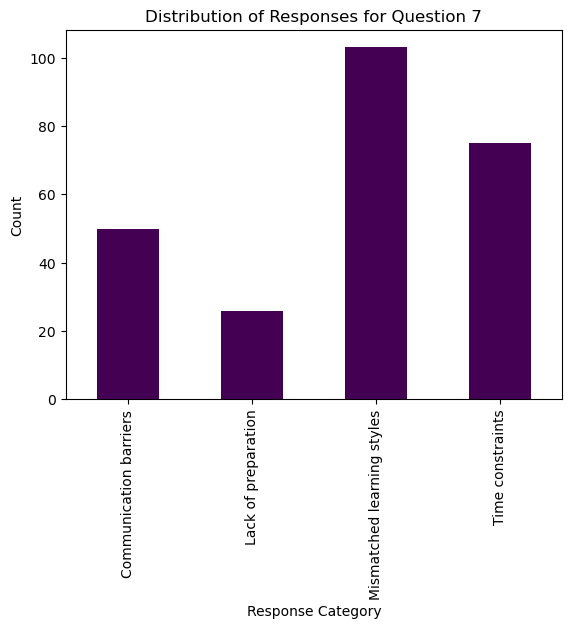

In [ ]:
question7_counts = df['Question7'].value_counts().sort_index()
question7_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Responses for Question 7')
plt.xlabel('Response Category')
plt.ylabel('Count')
plt.show()


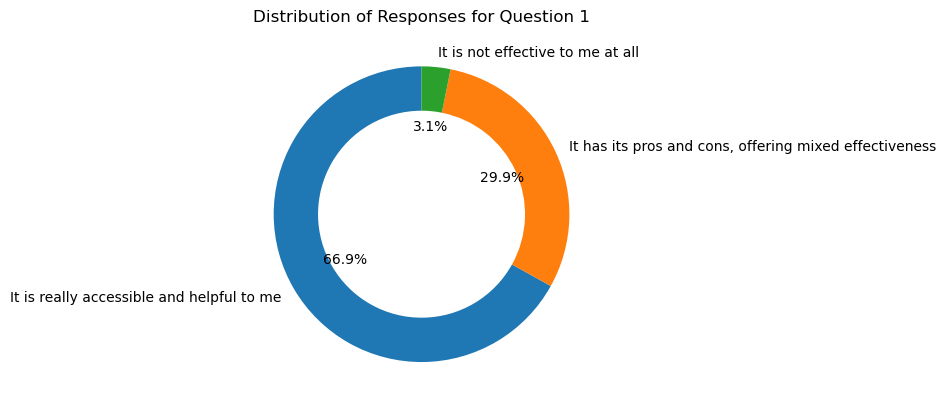

In [ ]:
#Overall responses of question 15
question1_counts = df['Question15'].value_counts()
plt.pie(question1_counts, labels=question1_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Responses for Question 1')
plt.show()


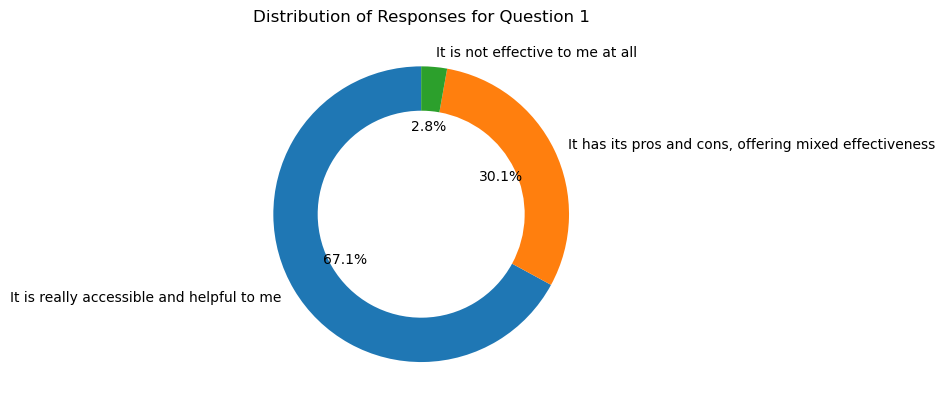

In [ ]:
#Responses of students who are involved in peer tutoring
data_yes =df[df['Question1']=="Yes"]
question1_counts = data_yes['Question15'].value_counts()
plt.pie(question1_counts, labels=question1_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribution of Responses for Question 1')
plt.show()


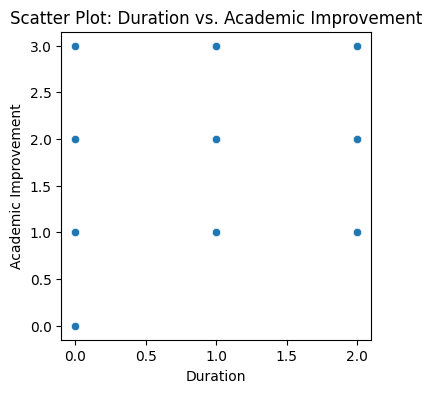

In [23]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x='E6', y='E8', data=df)
plt.title('Scatter Plot: Duration vs. Academic Improvement')
plt.xlabel('Duration')
plt.ylabel('Academic Improvement')
plt.show()

Question 13


In [ ]:
#H0:The tutor-tutee relationship is independent of learning outcomes.
#H1:There is a significant association between the tutor-tutee relationship and learning outcomes.

# Create a contingency table
contingency_table = pd.crosstab(df['Question13'], df['Question15'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Hypothesis testing
alpha = 0.05
print("\nResults is: ")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between the tutor-tutee relationship and learning outcomes.")
else:
    print("Fail to reject the null hypothesis: The tutor-tutee relationship is independent of learning outcomes.")

Contingency Table:
Question15                         It has its pros and cons, offering mixed effectiveness  \
Question13                                                                                  
Doesn't matter                                                                    18        
Friends tutoring each other                                                       50        
Randomly paired tutors and tutees                                                  8        

Question15                         It is not effective to me at all  \
Question13                                                            
Doesn't matter                                                    2   
Friends tutoring each other                                       3   
Randomly paired tutors and tutees                                 3   

Question15                         It is really accessible and helpful to me  
Question13                                                                    
D

Question 9


In [ ]:
#H0: There is not significant correlation between student engagement and academic improvement.
#H1: There is a significant correlation between student engagement and academic improvement.

#The commented code is for scatterplot
'''plt.figure(figsize=(10, 8))
sns.scatterplot(x='Question9', y='Question8', data=df)
plt.title('Student Engagement vs. Academic Improvement')
plt.xlabel('Student Engagement')
plt.ylabel('Academic Improvement')
plt.show()'''

spearman_corr, spearman_p_value = spearmanr(df['Question9'], df['Question8'])

print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman P-Value: {spearman_p_value:.4f}")

# Hypothesis testing
alpha = 0.05

if spearman_p_value < alpha:
    print("Reject the null hypothesis: There is a significant Spearman rank correlation.")
else:
    print("Fail to reject the null hypothesis: No significant Spearman rank correlation.")


Spearman Rank Correlation Coefficient: -0.2388
Spearman P-Value: 0.0001
Reject the null hypothesis: There is a significant Spearman rank correlation.


C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
